C:\Users\Emre Mutlu\AppData\Local\Temp\ipykernel_18404\846651861.py:8: DtypeWarning: Columns (13,23,48,49,50,51,52,53,54,70,71,74,75,76,77,78,79,80,81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  InstitutionalChar = pd.read_csv("HD_2015-2021_data.csv")


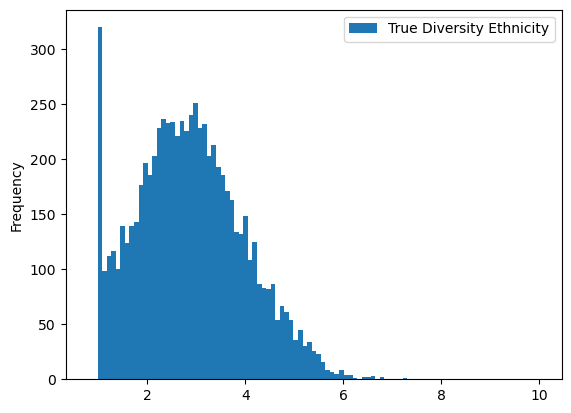

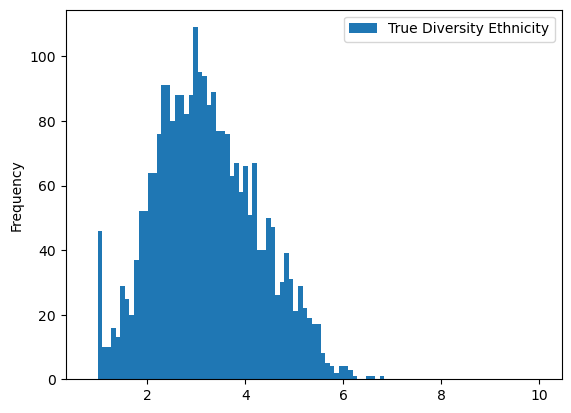

In [41]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

fallEnrollment = pd.read_csv("EFA_2015-2020_data.csv") 
studentFinances = pd.read_csv("SFA_1415-2021_data.csv")
InstitutionalChar = pd.read_csv("HD_2015-2021_data.csv")
Admissions = pd.read_csv("ADM_2015-2021_data.csv")
CD = pd.read_csv("censusdata.csv")


is_totalEnrollment =  fallEnrollment['line']=="Total enrollment"
uniqueFallEnrollment = fallEnrollment[is_totalEnrollment].copy()

is_2015 = uniqueFallEnrollment['year']==2015
uFA2015 = uniqueFallEnrollment[is_2015]

## The final data table for fall Enrollment. 

uFAT = uFA2015.drop(['eftotlm', 'eftotlw','efaianm','efaianw','efasiam','efasiaw','efbkaam','efbkaaw','efhispm','efhispw','efnhpim','efnhpiw','efwhitm','efwhitw','ef2morm','ef2morw','efunknm','efunknw','efnralm','year'], axis=1)

cols = ['efaiant', 'efasiat', 'efbkaat', 'efhispt', 'efnhpit','efwhitt','ef2mort','efunknt','efnralt']
def diversity(values): 
    sum = 0 
    totalvalue = values[0]
    for x in values[1:]: 
        proportion = x/totalvalue
        if (proportion > 0): 
            sum = sum + (-1)*(proportion)*np.log(proportion)
    return sum 

uFAT['DiscrepancyCheck'] = uFAT['eftotlt'] - uFAT[cols].sum(axis=1) 

uFAT['Shannon Diversity Ethnicity'] = uFAT[['eftotlt'] + cols].apply(diversity, axis =1)
uFAT['True Diversity Ethnicity'] = uFAT['Shannon Diversity Ethnicity'].apply(np.exp, axis=1)

uFATNormalized = uFAT[uFAT['eftotlt']>1000]

ax = uFAT.plot.hist(column='True Diversity Ethnicity', bins = np.linspace(0.8,10,100))
fig = ax.get_figure()
fig.savefig('Histo.pdf')

ax2 = uFATNormalized.plot.hist(column='True Diversity Ethnicity', bins = np.linspace(0.8,10,100))
fig2 = ax2.get_figure()
fig2.savefig('Histo1000.pdf')

## This is the data table for student finances breakdown. 

financecols = ['gis4n2', 'gis4n12', 'gis4n22', 'gis4n32', 'gis4n42', 'gis4n52']
SFF = studentFinances[['unitid'] + financecols + ['year']].copy()
SFF['DiscrepancyCheck'] = SFF['gis4n2'] - SFF[financecols[1:]].sum(axis=1) 
SFFSee = SFF[SFF['unitid']==108852]
SFF = SFF[SFF['DiscrepancyCheck'].notnull()]
SFF = SFF[SFF['year']==1415]
SFF['Shannon Diversity Finance'] = SFF[financecols].apply(diversity, axis =1)
SFF['True Diversity Finance'] = SFF['Shannon Diversity Finance'].apply(np.exp, axis=1)
SFFTEST = SFF[SFF['unitid']==100654] ## WE SHOULD HAVE 1 UNIQUE ROW PER COLLEGE

## Admissions Data 

Admissions['Acceptance Rate'] = (Admissions['admssn'] / Admissions['applcn'])
SelectiveColleges = Admissions[Admissions['Acceptance Rate'] < 0.4].copy()
Selective2015 = SelectiveColleges[SelectiveColleges['year']==2015]
Selective2015 = Selective2015[['unitid','Acceptance Rate']]


## Testing using merges. 

## Correlation between ethnic and financial diversity in general 
mergedSF_FE = uFAT[['unitid','Shannon Diversity Ethnicity','True Diversity Ethnicity']].merge(SFF[['unitid','Shannon Diversity Finance','True Diversity Finance']], on='unitid')
c1 = mergedSF_FE[['Shannon Diversity Ethnicity','Shannon Diversity Finance']].corr()
c11 = mergedSF_FE[['True Diversity Ethnicity','True Diversity Finance']].corr()

## Correlation between >50% white and financial diversity for predominantly white. 
uFATWhite = uFAT[(uFAT['efwhitt']/uFAT['eftotlt']) > 0.5]
mergedWSF_FE = uFATWhite[['unitid','Shannon Diversity Ethnicity','True Diversity Ethnicity']].merge(SFF[['unitid','Shannon Diversity Finance','True Diversity Finance']], on='unitid')
c2 = mergedWSF_FE[['Shannon Diversity Ethnicity','Shannon Diversity Finance']].corr()
c22 = mergedWSF_FE[['True Diversity Ethnicity','True Diversity Finance']].corr()

## Correlation between ethnicity and finance for selective. 
uFATSelective = uFAT.merge(Selective2015, on='unitid')
mergedSSF_FE = uFATSelective[['unitid','Shannon Diversity Ethnicity','True Diversity Ethnicity']].merge(SFF[['unitid','Shannon Diversity Finance','True Diversity Finance']], on='unitid')
c3 = mergedSSF_FE[['Shannon Diversity Ethnicity','Shannon Diversity Finance']].corr()
c33 = mergedSSF_FE[['True Diversity Ethnicity','True Diversity Finance']].corr()

## Correlation between ethnicity and finance






